## Matt Sloane / ms9548

#### Thursday Session - Homework 8: Find outliers, trends and periodicity in the MTA turnstile data

In [289]:
# Import Necessary Modules and Set Up Environment
import numpy as np
import os
import pylab as pl
import pandas as pd
%pylab inline
pui_Data = os.getenv("PUIDATA")

Populating the interactive namespace from numpy and matplotlib


In [290]:
# Load Data
mta_Data = np.load(pui_Data + "/MTA_Fare.npy")
mta_Data.shape

# Clean Data
mta_Data = mta_Data.astype('float')
mta_Data[mta_Data == -1] = np.nan
mta_Data

array([[[  5.69610000e+04,   6.47030000e+04,   6.80020000e+04, ...,
           3.65270000e+04,   3.39290000e+04,   3.68240000e+04],
        [  1.73200000e+03,   2.08300000e+03,   2.10700000e+03, ...,
           1.26400000e+03,   1.17200000e+03,   1.23800000e+03],
        [  2.03000000e+02,   2.76000000e+02,   2.45000000e+02, ...,
           1.86000000e+02,   1.67000000e+02,   1.67000000e+02],
        ..., 
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [             nan,              nan,              nan, ...,
           1.12100000e+03,   1.37700000e+03,   7.12000000e+02]],

       [[  1.62100000e+04,   2.01790000e+04,   2.17690000e+04, ...,
                      nan,              nan,              nan],
        [  5.03000000e+02,   6.47000000e+02,   6.65000000e+0

In [291]:
 # Sum time series for all stations and mean / standard deviation stat metrics
station_Sum = np.nansum(mta_Data, axis=0)
station_Mean = np.nanmean(mta_Data, axis=0)
station_SD = np.nanstd(mta_Data, axis = 0)

# Sum time series for all ride types and mean / standard deviation stat metrics
ride_Sum = np.nansum(mta_Data, axis=1)
ride_Mean = np.nanmean(mta_Data, axis=1)
ride_SD = np.nanstd(mta_Data, axis = 1)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:1136: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:1136: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)


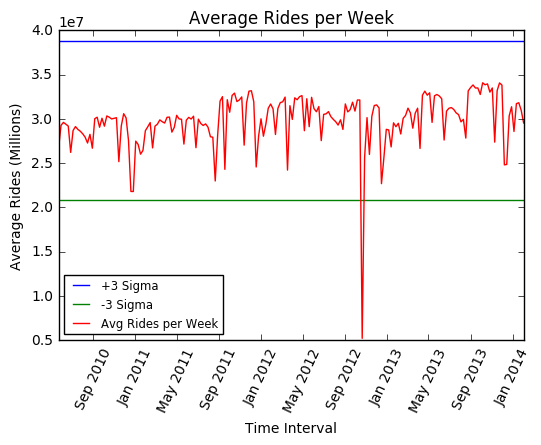

In [305]:
# Task 1 - Find Most Prominent Event

# Graph Data
time_Int = pd.date_range('5/21/2010', periods=194, freq='W') # Establish Date Interval - 194 weeks
rides_Week = np.nansum(station_Sum, axis = 0)                # Total Rides By Week
high_t = np.nanmean(rides_Week, axis = 0) + (np.nanstd(rides_Week, axis = 0)*3) # 3 STD Upper Threshold
low_t= np.nanmean(rides_Week, axis = 0) - (np.nanstd(rides_Week, axis = 0)*3)   # 3 STD Lower Threshold
pl.xticks(rotation = '65')
pl.plot((min(time_Int), max(time_Int)),(high_t, high_t), label = '+3 Sigma')
pl.plot((min(time_Int), max(time_Int)),(low_t, low_t), label = '-3 Sigma ')
pl.plot(time_Int, rides_Week, label = 'Avg Rides per Week')
pl.title ('Average Rides per Week')
pl.xlabel ('Time Interval')
pl.ylabel ('Average Rides (Millions)')
pl.legend(loc = 3, fontsize = 'small')

#### The chart above shows average total rides in red (for all cardtypes combined) over a period starting at 5/21/2010 and going through 2/21/2014 (194 weeks, total).  Thresholds of +3 (blue) and -3 (green) standard deviation from mean rides per week to identify potential outliers in the data.  One outlier is observed approximately 3/4ths of the way through the time series around Oct / Nov 2012, where ridership approaches zero.

In [310]:
# Find array index of lowest value (yields week of event)
out_IV = np.where(rides_Week == rides_Week.min())

# code for above function found here: 
# http://stackoverflow.com/questions/19546863/find-the-index-of-minimum-values-in-given-array-in-python

# Print 
print ("The week of {} contains the outlier for low ridership".format(time_Int[out_IV]) )

The week of DatetimeIndex(['2012-10-21'], dtype='datetime64[ns]', freq=None) contains the outlier for low ridership


#### The week of October 21, 2012 was the week Hurricane Sandy hit New York City, which would explain extremely low subway usage, and subway service was shutdown: https://en.wikipedia.org/wiki/Effects_of_Hurricane_Sandy_in_New_York

In [295]:
# Task 2 - Identify the ridership types that have steadily increased in popularity, and that have steadily decreased, 
# and by how much?

# Initialize counting and ridetypes variables
mean_Start = []  
mean_End = []
ratio_Means = []
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [296]:
# Loop through station_Sum array, summing first 10 weeks and last 10 weeks of each card type ride, and calculating
# ratio

for x in arange(0,len(station_Sum)):
    mean_Start.append(station_Sum[x,:10].mean())    # mean of first 10 weeks and append to list
    mean_End.append(station_Sum[x,:-10].mean())     # mean last 10 weeks and append to list
    ratio_Means.append(mean_Start[x] / mean_End[x])   # divide mean start by mean end to get ratio, by card type


# clean data and combine data into one array
ride_Stats = np.column_stack((ridetype, mean_Start, mean_End, ratio_Means))
ride_Stats

array([['10t', '12347326.1', '13276389.31521739', '0.9300213941336821'],
       ['14d', '533376.2', '625741.6576086957', '0.8523904290443517'],
       ['1d', '49898.9', '56357.815217391304', '0.8853945066451376'],
       ['2t', '190627.5', '187706.5', '1.0155615282369017'],
       ['30d', '47956.2', '48502.413043478264', '0.9887384356941451'],
       ['7d', '3934303.6', '4758076.478260869', '0.826868508309062'],
       ['ada', '9117571.2', '8999465.81521739', '1.0131235994677485'],
       ['afas', '10981.3', '1988.5326086956522', '5.522313263549154'],
       ['exp', '327499.7', '51355.97282608696', '6.377051820419262'],
       ['ez', '599218.7', '104810.21195652174', '5.717178591801464'],
       ['ff', '41254.9', '22133.489130434784', '1.8639130846872312'],
       ['mc', '131889.7', '117792.85869565218', '1.119674838190069'],
       ['mr', '5.8', '30893.630434782608', '0.00018774096531788247'],
       ['month', '137296.4', '109443.75', '1.2544928330763518'],
       ['rfm', '844028.3', 

In [297]:
# Identify card types which increased and decreased in usage

# initialize variables
increase_Type= []
decrease_Type = []
ratio_Temp = []

# loop through ride_Stats array and divide data
for y in arange(0,len(ride_Stats)-1):
    if float(ride_Stats[y][3]) < 1:
        increase_Type.append(ride_Stats[y][0])
    else:
        decrease_Type.append(ride_Stats[y][0]) 
    
    
        
print ('The following card types increased in populatarity over the courrse of the study period:')
print (increase_Type)
print ('')
print ('The following card types decreased in populatarity over the courrse of the study period:')
print (decrease_Type)
print ('')

# Identify which card type experienced the greatest increase in usage and which had the greatest decrease

# Loop through ratio means list and remove any zero value

for z in arange(0,len(ratio_Means)-1):
    if ratio_Means[z] != 0:
        ratio_Temp.append(ratio_Means[z])

# Find min and max values and associated index values

min_Pop = max(ratio_Temp)
min_PopInd = ratio_Temp.index(min_Pop)
max_Pop = min(ratio_Temp)
max_PopInd = ratio_Temp.index(max_Pop)


print ('The {} cardtype experienced the greatest decrease in usage with a \
ratio of {}'.format(ride_Stats[min_PopInd][0],min_Pop))

print ('')

print ('The {} cardtype experienced the greatest increase in usage with a \
ratio of {}'.format(ride_Stats[max_PopInd][0],max_Pop))

The following card types increased in populatarity over the courrse of the study period:
['10t', '14d', '1d', '30d', '7d', 'mr', 'rr', 'sen', 'spec', 'tcmc', 't', 'xbus']

The following card types decreased in populatarity over the courrse of the study period:
['2t', 'ada', 'afas', 'exp', 'ez', 'ff', 'mc', 'month', 'rfm', 'umlim']

The exp cardtype experienced the greatest decrease in usage with a ratio of 6.377051820419262

The mr cardtype experienced the greatest increase in usage with a ratio of 0.00018774096531788247


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  app.launch_new_instance()


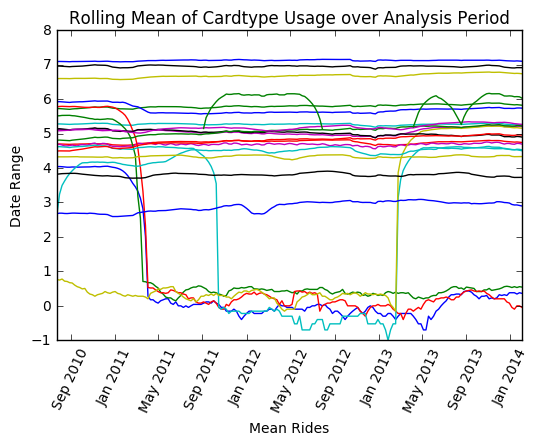

In [352]:
# Graph Rides by Card Type over Time Series (Rolling Mean)
station_SumT = station_Sum.transpose()   # transpose array to plot against tie interval
rm_Temp = pd.stats.moments.rolling_mean(station_SumT, 10)
#rm_Final = np.append(rm_Temp,ridetype)
#rm_Final[0:193].astype(float)

pl.xticks(rotation = '65')
pl.title('Rolling Mean of Cardtype Usage over Analysis Period')
pl.xlabel('Mean Rides')
pl.ylabel('Date Range')
# rolling mean of rides by card type
pl.plot(time_Int, np.log10(rm_Temp))

#### The above graph shows the rolling mean of card swipes for each cardtype over the time series.  There is cases where data jumps around a bit, point to th eneed for data to be cleaned a bit better, which I wasn't sure how to do.  I also wasn't sure how to add the ridetype names in the array to label them in the graph without creating incompatible array dimensions to graph versus the time interval. 